In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.drop('Id', axis=1, inplace =True)

In [6]:
df.duplicated().sum()

np.int64(3)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
plotted_column= ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

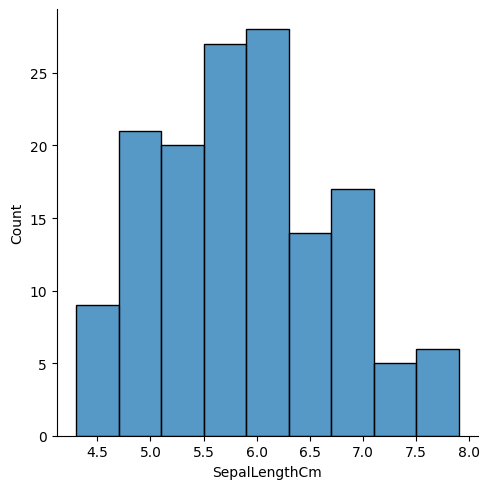

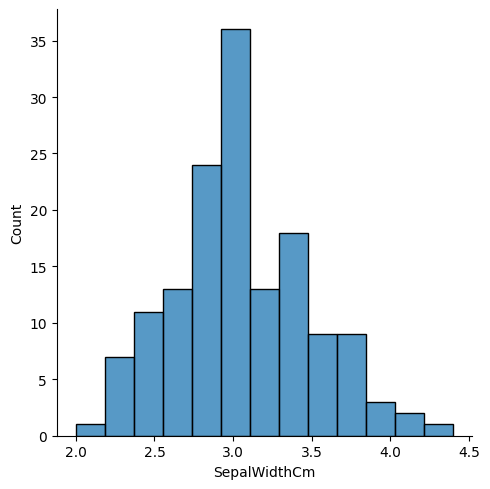

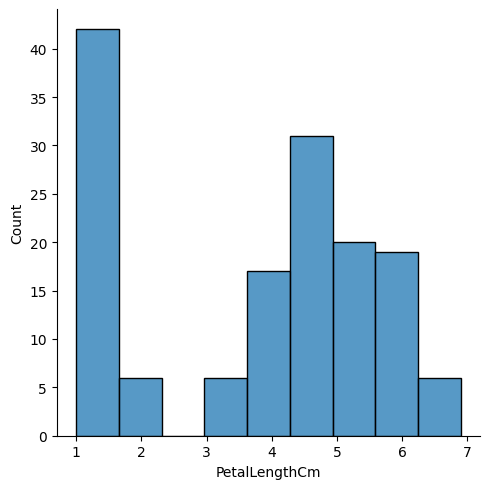

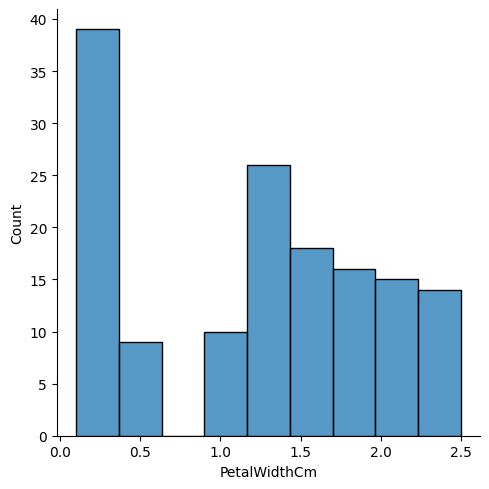

In [11]:
for col in plotted_column:
    sns.displot(data=df, x=col)

In [12]:
df['Species'].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

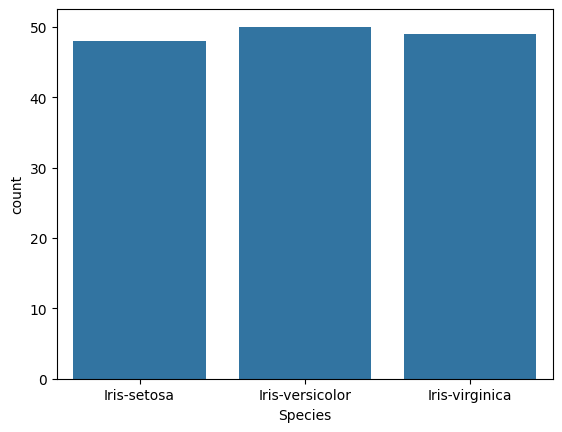

In [13]:
sns.countplot(data=df, x='Species')

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
target_encoder= LabelEncoder()

In [16]:
df['Species']= target_encoder.fit_transform(df['Species'])

In [17]:
df.Species.unique()

array([0, 1, 2])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x= df.drop('Species', axis=1)
y= df['Species']

In [20]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.15, stratify=y, random_state=7)

In [21]:
x_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,124.000000,124.000000,124.000000,124.00000
mean,5.874194,3.079032,3.786290,1.21129
std,0.831384,0.435101,1.778249,0.76819
min,4.300000,2.200000,1.000000,0.10000
25%,5.200000,2.800000,1.600000,0.30000
50%,5.800000,3.000000,4.300000,1.30000
75%,6.400000,3.400000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler= StandardScaler()

In [24]:
x_train[x_train.columns]= scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns]= scaler.transform(x_test[x_test.columns])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model= LogisticRegression(multi_class='ovr')

In [27]:
model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [28]:
model.score(x_train,y_train)

0.9354838709677419

In [29]:
y_train_pred= model.predict(x_train)
y_test_pred= model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print('Train Score: ', accuracy_score(y_train, y_train_pred))
print('Test Score: ', accuracy_score(y_test, y_test_pred))

Train Score:  0.9354838709677419
Test Score:  0.9130434782608695


In [32]:
model.coef_

array([[-1.01242327,  1.27712783, -1.61840962, -1.49653665],
       [ 0.180766  , -1.54349941,  0.50607073, -0.77638966],
       [ 0.07326679, -0.29621547,  2.30624796,  2.85847635]])

In [33]:
model.intercept_

array([-2.36837636, -0.96578554, -3.39404414])

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [35]:
cm= confusion_matrix(y_train_pred, y_train)

In [36]:
y_train.value_counts()

Species
1    42
2    41
0    41
Name: count, dtype: int64

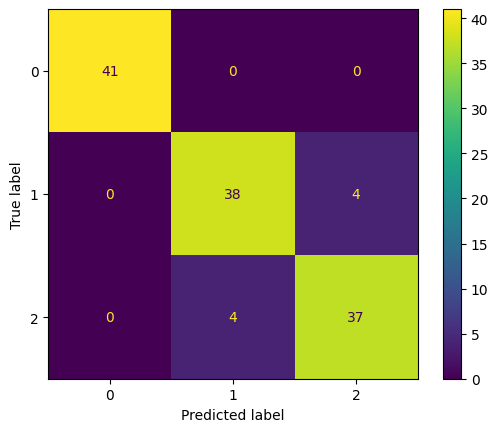

In [37]:
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()

In [38]:
test_df= pd.DataFrame({'SepalLengthCm':[0.635013],
                       'SepalWidthCm':[0.048386],
                       'PetalLengthCm':[0.967616],
                       'PetalWidthCm':[0.769469]})

In [39]:
test_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.635013,0.048386,0.967616,0.769469


In [40]:
model.predict(test_df)

array([2])

In [41]:
model.predict_proba(test_df)

array([[0.00341104, 0.25974397, 0.736845  ]])

### Try different Values for C Inverse Regulariztion Parameters

In [42]:
from sklearn.linear_model import LogisticRegression

### L1 Regulariztion

In [43]:
C_Values = [ 1 , 100 , 10 , 0.001]

for c in C_Values:
    model= LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', C=c)
    model.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred= model.predict(x_test)
    print('Train Score: ', accuracy_score(y_train, y_train_pred))
    print('Test Score: ', accuracy_score(y_test, y_test_pred))
    print("Model Coeff " , model.coef_)
    print("\n")

Train Score:  0.9354838709677419
Test Score:  0.9130434782608695
Model Coeff  [[ 0.          1.20593019 -4.10390275  0.        ]
 [ 0.2060532  -1.64019231  0.         -0.33447832]
 [ 0.         -0.18713458  2.30056678  4.05111806]]


Train Score:  0.967741935483871
Test Score:  1.0
Model Coeff  [[ 0.00000000e+00  3.00524281e+00 -5.52048430e+00 -3.76305699e+00]
 [ 8.14397164e-03 -1.59947208e+00  1.65974301e+00 -1.79198391e+00]
 [-2.42079423e+00 -1.97597252e+00  1.45962006e+01  9.97281009e+00]]


Train Score:  0.967741935483871
Test Score:  1.0
Model Coeff  [[ 0.          2.06503866 -5.56387317 -1.05434568]
 [ 0.03785638 -1.60582068  1.45975142 -1.62146949]
 [-1.70078992 -1.25418168  9.70793207  6.97411068]]


Train Score:  0.33064516129032256
Test Score:  0.30434782608695654
Model Coeff  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]




### L2 Regulariztion

In [44]:
C_Values = [ 1 , 100 , 10 , 0.001]

for c in C_Values:
    model= LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr', C=c)
    model.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred= model.predict(x_test)
    print('Train Score: ', accuracy_score(y_train, y_train_pred))
    print('Test Score: ', accuracy_score(y_test, y_test_pred))
    print("Model Coeff " , model.coef_)
    print("\n")

Train Score:  0.9032258064516129
Test Score:  0.8695652173913043
Model Coeff  [[-0.78140677  1.44912165 -1.5418142  -1.38191724]
 [ 0.18326423 -1.52009411  0.49922198 -0.77499454]
 [-0.02311841  0.09280204  1.75365283  2.4451679 ]]


Train Score:  0.967741935483871
Test Score:  0.9565217391304348
Model Coeff  [[-1.43688316  3.07313959 -3.45745035 -3.08747277]
 [ 0.01524044 -1.60198509  1.63751327 -1.77701914]
 [-1.83327083 -1.37458271  9.88075127  7.36910617]]


Train Score:  0.9435483870967742
Test Score:  0.9130434782608695
Model Coeff  [[-1.09285016  2.24802661 -2.43867489 -2.15842031]
 [ 0.08946318 -1.62188973  1.30795558 -1.52208928]
 [-0.8267359  -0.64472358  4.87359338  4.77336835]]


Train Score:  0.8306451612903226
Test Score:  0.782608695652174
Model Coeff  [[-0.03797288  0.03453644 -0.0494366  -0.0473999 ]
 [ 0.00398428 -0.0289027   0.01092377  0.00587525]
 [ 0.03398465 -0.00563124  0.03850894  0.04152092]]


